<h1 align=center><font size = 5>Data Science and Machine Learning Capstone Project</font></h1>

### Question 2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1? ###

***<font size = 3>Data preparation</font>***

Import libraries and data

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Prepare dataframe

In [3]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key'] 
df_311= pd.read_csv('fhrw-4uyv.csv', parse_dates = ['created_date'], usecols = columns_used)
df_311.head()

,borough,city,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,street_name,unique_key
0,MANHATTAN,NEW YORK,APPLIANCE,2016-12-05 16:13:38,4530 BROADWAY,10040.0,40.858663,RESIDENTIAL BUILDING,-73.931621,BROADWAY,34931759
1,QUEENS,Richmond Hill,DOOR/WINDOW,2016-12-05 20:43:42,86-41 127 STREET,11418.0,40.702431,RESIDENTIAL BUILDING,-73.824103,127 STREET,34931760
2,BROOKLYN,BROOKLYN,DOOR/WINDOW,2016-12-05 14:59:24,788 NEW LOTS AVENUE,11208.0,40.666954,RESIDENTIAL BUILDING,-73.881327,NEW LOTS AVENUE,34931765
3,MANHATTAN,NEW YORK,DOOR/WINDOW,2016-12-05 16:40:33,153 MANHATTAN AVENUE,10025.0,40.799426,RESIDENTIAL BUILDING,-73.960927,MANHATTAN AVENUE,34931771
4,BROOKLYN,BROOKLYN,SAFETY,2016-12-05 07:57:43,613 EAST 16 STREET,11226.0,40.635246,RESIDENTIAL BUILDING,-73.962338,EAST 16 STREET,34931773


Lets create a variabel that holds all data for 'HEAT/HOT WATER' complaint type.

In [4]:
# Set the top complaint variable
df_311_top_complaint = df_311[df_311['complaint_type'] == 'HEAT/HOT WATER'].reset_index(drop = True)
df_311_top_complaint.head() 

,borough,city,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,street_name,unique_key
0,BROOKLYN,BROOKLYN,HEAT/HOT WATER,2016-12-05 07:18:58,222 LENOX ROAD,11226.0,40.654022,RESIDENTIAL BUILDING,-73.951909,LENOX ROAD,34931822
1,BROOKLYN,BROOKLYN,HEAT/HOT WATER,2016-12-05 09:23:34,1535 SHORE PARKWAY,11214.0,40.597218,RESIDENTIAL BUILDING,-74.003338,SHORE PARKWAY,34931857
2,BROOKLYN,BROOKLYN,HEAT/HOT WATER,2016-12-05 12:18:39,436 EASTERN PARKWAY,11225.0,40.670047,RESIDENTIAL BUILDING,-73.954092,EASTERN PARKWAY,34931859
3,BROOKLYN,BROOKLYN,HEAT/HOT WATER,2016-12-05 21:45:55,1488 DE KALB AVENUE,11237.0,40.701658,RESIDENTIAL BUILDING,-73.921825,DE KALB AVENUE,34931860
4,BROOKLYN,BROOKLYN,HEAT/HOT WATER,2016-12-05 15:58:28,1214 AVENUE I,11230.0,40.627282,RESIDENTIAL BUILDING,-73.964393,AVENUE I,34931866


Let us count the number of our data.

In [5]:
df_311_top_complaint.shape

(1087060, 11)

***<font size = 3> 1. Borough</font>***

First, we will work on to see the distribution of the HEAT/HOT WATER complaint location based on borough. Lets check the values in borough column of our dataframe. 

In [6]:
df_311_top_complaint['borough'].unique()

array(['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

We see there is a data with 'Unspecified' as a value, lets check if we can fix this.

In [7]:
df_311_top_complaint[df_311_top_complaint['borough']=='Unspecified']

,borough,city,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,street_name,unique_key
935690,Unspecified,NEW YORK,HEAT/HOT WATER,2018-03-10 11:16:48,38 WEST 225 STREET,10463.0,40.873635,RESIDENTIAL BUILDING,-73.907925,WEST 225 STREET,38662770


As we see there is only one row with 'Unspecified' value and if we check based on the **incident_address** or **logitude** and **latitude** coordinate, the complaint comes from Bronx area. Therefore, we can change this 'Unspecified' value into BRONX.

In [8]:
df_311_top_complaint.at[935690, 'borough'] ='BRONX'

In [9]:
df_311_top_complaint['borough'].unique()

array(['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'],
      dtype=object)

Next, let's us see the distribution of location where the top complaint comes from.

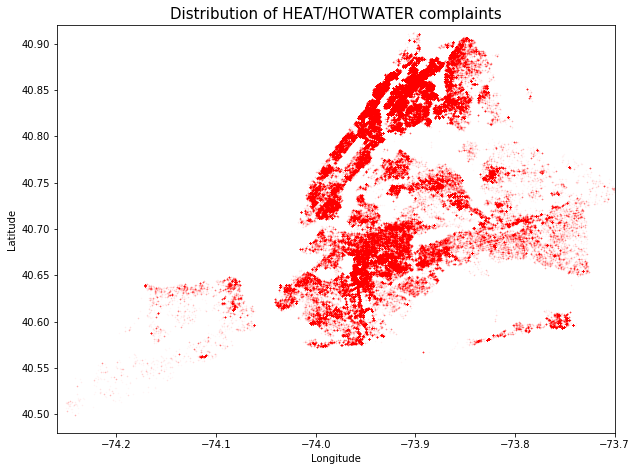

In [10]:
# adjust settings
plt.figure(figsize=(10,7.5))

# create scatterplots
plt.scatter(df_311_top_complaint.longitude, df_311_top_complaint.latitude, alpha=0.02, s=1, color='red')

# adjust more settings
plt.title('Distribution of HEAT/HOTWATER complaints', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.48,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)

plt.show()

Lets enhance out scatter plot to differentiate it based on borough.

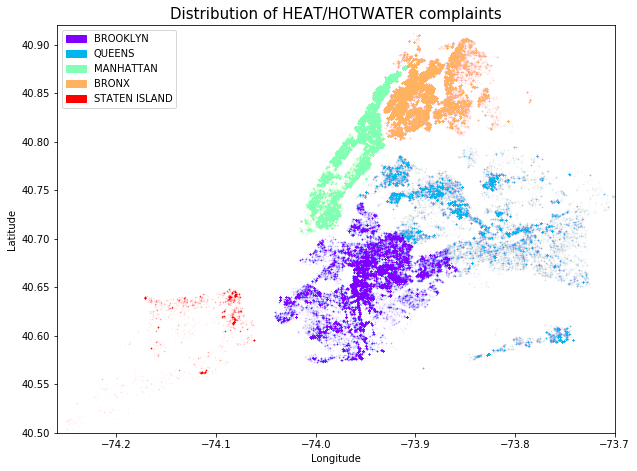

In [11]:
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_borough = list(df_311_top_complaint['borough'].unique())
# container for patches used in legends
patches = []

# setting color map
color_map = plt.cm.rainbow(np.linspace(0,1, len(list_value_borough)))
                           
for index, value in enumerate(list_value_borough):
    borough_top_complaint = df_311_top_complaint[df_311_top_complaint['borough']== value]
    # create scatterplots
    plt.scatter(borough_top_complaint.longitude, borough_top_complaint.latitude, s=1, 
                alpha=0.02,color= color_map[index], marker ='.')
    # create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_borough, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of HEAT/HOTWATER complaints', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

Seems like the complaint for heat/hot water is more prevalent in Brooklyn, Manhattan and Bronx area. Lets create a barh graph to support our claim.

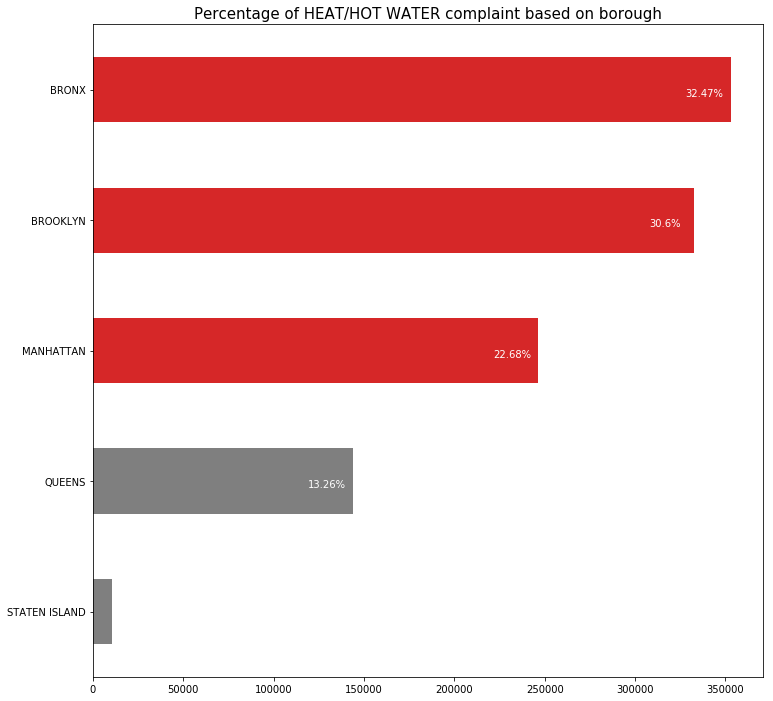

In [12]:
# Set bar color scheme
colors1 = ['C7', 'C7', 'C3', 'C3', 'C3']

borough_series_df311 = df_311_top_complaint['borough'].value_counts()
borough_series_df311.sort_values(ascending = True, inplace =True)
total_borough = borough_series_df311.sum()

# Create barh plot
borough_series_df311.plot(kind = 'barh', figsize = (12, 12), color = colors1)

# Set text label to show the percentage of each borough
for index, value in enumerate(borough_series_df311):
    label =  '{}%'.format(round((value/total_borough)*100, 2)) 
    plt.annotate(label, xy=(value - 25000, index- 0.05), color='white')

    
plt.title('Percentage of HEAT/HOT WATER complaint based on borough', size=15)
plt.show()

***<font size = 3> 2. Zip codes</font>***

Next, let us check the top 10 area where the complaint are severe based on zip code. Lets check the unique values in **incident_zip** column.

In [13]:
df_311_top_complaint['incident_zip'].unique()

array([11226., 11214., 11225., 11237., 11230., 11370., 10002., 10473.,
       11236., 11210., 10029., 10452., 10467., 11249., 11229., 11373.,
       10472., 11208., 11355., 10462., 11385., 10003., 11102., 11367.,
       10040., 10025., 11203., 10022., 11368., 11106., 10456., 11228.,
       10306., 11234., 10303., 11212., 11213., 11105., 11233., 10470.,
       10474., 10460., 11436., 10451., 10468., 10466., 10457., 10037.,
       10453., 10013., 11204., 10036., 11235., 10032., 11420., 11207.,
       11415., 11377., 11103., 10011., 10014., 10455., 10019., 11216.,
       10454., 10016., 10031., 11206., 10458., 10469., 11418., 11205.,
       10034., 10026., 11432., 10459., 11232., 10461., 10030., 10304.,
       10075., 11211., 11691., 10314., 11220., 11360., 10021., 11435.,
       11221., 10033., 11215., 10128., 10027., 10009., 10024., 10023.,
       11104., 10305., 10039., 10001., 11219., 11218., 11238., 11433.,
       11419., 11364., 11375., 11354., 11201., 11356., 10464., 11222.,
      

There is NaN values in this column. Now, check the number of data with missing value in zip code column.

In [13]:
df_311_top_complaint[df_311_top_complaint['incident_zip'].isnull()]

,borough,city,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,street_name,unique_key
174710,QUEENS,QUEENS,HEAT/HOT WATER,2019-01-16 16:41:27,6018 BLEECKER STREET,NaN,NaN,RESIDENTIAL BUILDING,NaN,BLEECKER STREET,41460020
346339,BRONX,NaN,HEAT/HOT WATER,2016-11-18 14:23:35,2113 NEW ENGLAND THRUWY SERINCE ROAD,NaN,NaN,RESIDENTIAL BUILDING,NaN,NEW ENGLAND THRUWY SERINCE ROAD,34815255
346342,QUEENS,NaN,HEAT/HOT WATER,2016-12-29 21:15:23,15-23 15 AVENUE,NaN,NaN,RESIDENTIAL BUILDING,NaN,15 AVENUE,35130759
346345,QUEENS,NaN,HEAT/HOT WATER,2017-01-05 10:48:46,87-82 RUBIE PLAZA,NaN,NaN,RESIDENTIAL BUILDING,NaN,RUBIE PLAZA,35175525
346346,QUEENS,NaN,HEAT/HOT WATER,2017-01-08 22:33:30,3-62 BEACH 88 STREET,NaN,NaN,RESIDENTIAL BUILDING,NaN,BEACH 88 STREET,35197562
346347,QUEENS,NaN,HEAT/HOT WATER,2017-01-10 11:46:39,87-82 RUBIE PLAZA,NaN,NaN,RESIDENTIAL BUILDING,NaN,RUBIE PLAZA,35213360
346348,QUEENS,NaN,HEAT/HOT WATER,2017-01-10 11:13:33,87-82 RUBIE PLAZA,NaN,NaN,RESIDENTIAL BUILDING,NaN,RUBIE PLAZA,35214634
346354,QUEENS,NaN,HEAT/HOT WATER,2017-02-06 08:06:01,10-33 WHITESTONE PARKWAY ST EAST,NaN,NaN,RESIDENTIAL BUILDING,NaN,WHITESTONE PARKWAY ST EAST,35430446
346355,QUEENS,NaN,HEAT/HOT WATER,2017-02-08 17:45:04,523 CENTRE STREET,NaN,NaN,RESIDENTIAL BUILDING,NaN,CENTRE STREET,35445965
346358,QUEENS,NaN,HEAT/HOT WATER,2017-02-10 16:59:23,523 CENTRE STREET,NaN,NaN,RESIDENTIAL BUILDING,NaN,CENTRE STREET,35469452


There are 7045 data row with missing values, we can somehow infer this value but it will be a tedious job and I think it is better to just ignore these data since the missing values data takes only ~0.65% of total data. So, lets just assume that data with the missing values distributed such that it doesn't do much interference with the distribution of the data sample based on zip codes as a whole. 

In [14]:
zip_series_df311 = df_311_top_complaint['incident_zip'].value_counts().head(10)
zip_series_df311 

11226.0    35305
10458.0    33596
10467.0    32887
10453.0    29760
10468.0    29546
10452.0    23898
10031.0    23438
10457.0    22800
10462.0    22422
10456.0    22191
Name: incident_zip, dtype: int64

Lets create barh graph to visualize the top 10 zip codes based area with the most severe complaint of HEAT/HOT WATER type.

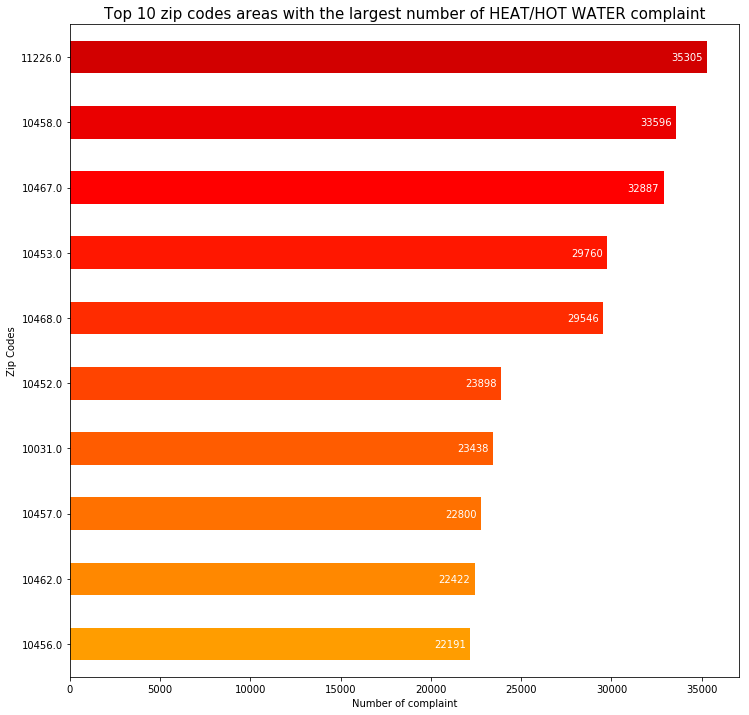

In [15]:
# Set bar color scheme
colors2= plt.cm.hot(np.linspace(0.6, 0.3, 10))

zip_series_df311.sort_values(ascending = True, inplace =True)

# Create barh plot
zip_series_df311.plot(kind = 'barh', figsize = (12, 12), color = colors2)

# Set text label to show the percentage of each borough
for index, value in enumerate(zip_series_df311):
    label =  '{}'.format(value) 
    plt.annotate(label, xy=(value - 2000, index- 0.05), color='white')

# adjust more settings
plt.title('Top 10 zip codes areas with the largest number of HEAT/HOT WATER complaint', size=15)
plt.xlabel('Number of complaint',size=10)
plt.ylabel('Zip Codes',size=10)
plt.show()

Now, let us see the distribution of complaint based on zip codes.

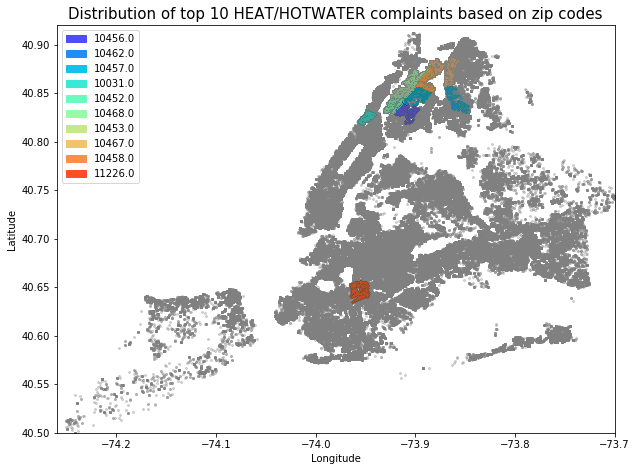

In [16]:
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_zip = zip_series_df311.keys()
# container for patches used in legends
patches = []

# setting color map
color_map = plt.cm.rainbow(np.linspace(0.1, 0.9, 10))

# create new york map using scatter plot
plt.scatter(df_311_top_complaint.longitude, df_311_top_complaint.latitude, alpha=0.3, s=4, color='grey')

for index, value in enumerate(list_value_zip):
    zip_top_complaint = df_311_top_complaint[df_311_top_complaint['incident_zip']== value]
    # create scatterplots
    plt.scatter(zip_top_complaint.longitude, zip_top_complaint.latitude, s=1, 
                alpha=0.02,color= color_map[index], marker ='.')
    # create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_zip, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of top 10 HEAT/HOTWATER complaints based on zip codes', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

We can see that 8 of top 10 zip code based area with severe HEAT/HOT WATER complaint comes from Bronx, 1 from Manhattan(10031.0) and 1 from Brooklyn(11226.0).

***<font size = 3> 3. Street</font>***

Lets see the top 10 street where the complain is the most severe. Now, lets check the number of data with missing values on **street_name** column. 

In [17]:
df_311_top_complaint[df_311_top_complaint['street_name'].isnull()]

,borough,city,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,street_name,unique_key


Fortunately, there is no data with missing value on **street_name** column. Now, lets see the top 10 street with the most severe heat/hot water complaint. Before that we must group the data based on borough, to differentiate streets with the same name but locates separately(and not connected) in different borough.

In [22]:
street_series_df311 = df_311_top_complaint.groupby(['borough'])
street_series_df311 = street_series_df311['street_name'].value_counts().sort_values(ascending = False).head(10)
street_series_df311

borough    street_name             
BRONX      GRAND CONCOURSE             19275
MANHATTAN  BROADWAY                    12314
BROOKLYN   OCEAN AVENUE                 8681
BRONX      MORRIS AVENUE                8666
QUEENS     ELMHURST AVENUE              8634
BRONX      BOYNTON AVENUE               8220
MANHATTAN  ST NICHOLAS AVENUE           7335
           AMSTERDAM AVENUE             6479
BRONX      DR M L KING JR BOULEVARD     5773
BROOKLYN   OCEAN PARKWAY                5545
Name: street_name, dtype: int64

Visualize this data using barh graph.

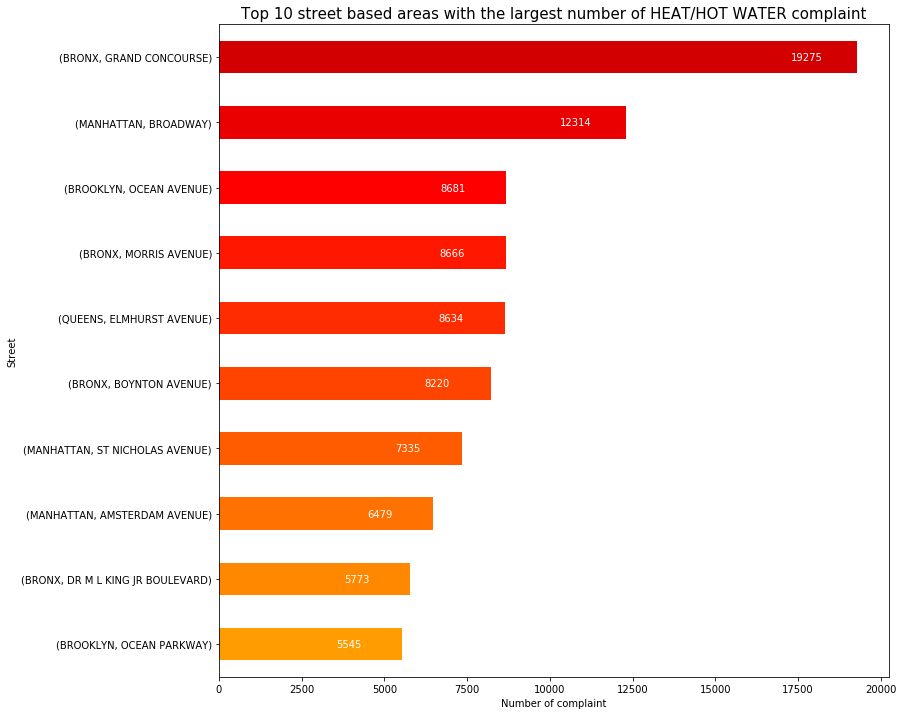

In [23]:
street_series_df311.sort_values(ascending = True, inplace =True)

# Create barh plot
street_series_df311.plot(kind = 'barh', figsize = (12, 12), color = colors2)

# Set text label to show the percentage of each borough
for index, value in enumerate(street_series_df311):
    label =  '{}'.format(value) 
    plt.annotate(label, xy=(value - 2000, index- 0.05), color='white')

# adjust more settings
plt.title('Top 10 street based areas with the largest number of HEAT/HOT WATER complaint', size=15)
plt.xlabel('Number of complaint',size=10)
plt.ylabel('Street',size=10)
plt.show()

Now, let us see the distribution of complaint based on street.

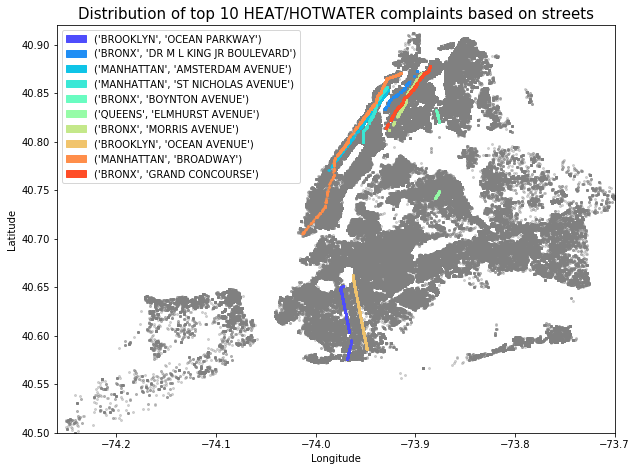

In [27]:
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_street = street_series_df311.keys()
# container for patches used in legends
patches = []

# setting color map
color_map = plt.cm.rainbow(np.linspace(0.1, 0.9, 10))

# create new york map using scatter plot
plt.scatter(df_311_top_complaint.longitude, df_311_top_complaint.latitude, alpha=0.3, s=4, color='grey')

for index, value in enumerate(list_value_street):
    street_top_complaint = df_311_top_complaint[np.logical_and(df_311_top_complaint['borough']== value[0], 
                                                               df_311_top_complaint['street_name']== value[1])]
    # create scatterplots
    plt.scatter(street_top_complaint.longitude, street_top_complaint.latitude, s=8, 
                alpha=0.7,color= color_map[index], marker ='.')
    # create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_street, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of top 10 HEAT/HOTWATER complaints based on streets', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

***<font size = 3>Conclusion</font>***

Based on the analysis above, I am in the opinion that the Department of Housing Preservation and Development of New York City should focus a particular set of areas in dealing with the heat/hot water complaint. The reason is because, there are some area that the number of complaint is a lot bigger than another area, for example at Bronx area, where the number of complaint is more than two times of the Queens and Staten Island combined. Another examples is like Grand Concourse street that almost 2.3 times the number of complaints comes from Ocean Avenue, which is listed at third place in the top 10 list of street based on the number of complaints.   

Here are the list of areas that epartment of Housing Preservation and Development of New York City should focusing first. In terms of borough, they should focus on these three boroughs first, listed in order of priority:
<ol>
    <li>Bronx</li>
    <li>Brooklyn</li>
    <li>Manhattan</li>
</ol>

if they want to narrow the focus in areas based on zip code, then here is the list of area zip codes that they may focus on first, listed in order of priority:

<ol>
    <li>11226.0</li>
    <li>10458.0</li>
    <li>10467.0</li>
    <li>10453.0</li>
    <li>10468.0</li>
    <li>10452.0</li>
    <li>10031.0</li>
    <li>10457.0</li>
    <li>10462.0</li>
    <li>10456.0</li>
</ol>

Lastly, if the Department of Housing Preservation and Development of New York City want to focus in dealing with heat/hot water complaint in areas based on street name, then here is the top 10 list street based areas that they can focusing first, listed in order of priority:

<ol>
    <li>GRAND CONCOURSE, BRONX</li> 
    <li>BROADWAY, MANHATTAN</li>
    <li>OCEAN AVENUE, BROOKLYN</li>
    <li>MORRIS AVENUE, BRONX</li>
    <li>ELMHURST AVENUE, QUEENS</li>
    <li>BOYNTON AVENUE, BRONX</li>
    <li>ST NICHOLAS AVENUE, MANHATTAN</li>
    <li>AMSTERDAM AVENUE, MANHATTAN</li>
    <li>DR M L KING JR BOULEVARD, BRONX</li>
    <li>OCEAN PARKWAY, BROOKLYN</li>
</ol>

***<font size = 3>Author : Hadi Muhshi</font>*** 